# **Instalacion de librerias**

In [1]:
!pip install dask[dataframe]
!pip install lifelines==0.26.0
!pip install biopython
!pip install padelpy
!pip install padel-pywrapper
!pip install rdkit
!pip install mol2vec
!pip install rdkit-pypi
!pip install propy3
!pip install PyBioMed
!pip install PyProtein
!pip install bayesian-optimization
!pip install scikit-optimize
!pip install openpyxl
!pip install hyperopt

In [2]:
# librerias para leer datos y archivos
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Etapa 4 del desarrollo: Preprocesamiento y Normalización.

In [3]:
dataset = pd.read_excel("datasets/dataset_cov_obps_4.xlsx")

In [4]:
dataset

,Compound name,protein_name,Smiles,AA Sequence W/O signal peptide,affinity,nAcid,ALogP,ALogp2,AMR,apol,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MEVEMLPEGMKQLTGGFIKVFEACKTELGLKDGMLTDMYHLWREEY...,7.13,0,1.5768,2.486298,60.6615,37.017860,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MMKDMTKNFLKAYGECQQELHLTDDTARDLMFFWKEDYEVTSREAG...,10.06,0,1.5768,2.486298,60.6615,37.017860,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,CC(=O)/C=C/C1=C(C)CCCC1(C)C,SQEVMKKMSATFFKLLEECKKELSVTDDMIQGLVRFWLEDSALGER...,9.85,0,1.5768,2.486298,60.6615,37.017860,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,CC(=O)/C=C/C1=C(C)CCCC1(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,12.93,0,1.5768,2.486298,60.6615,37.017860,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,1.5768,2.486298,60.6615,37.017860,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,CCC(O)C(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,30.00,0,-0.1745,0.030450,29.0406,20.697102,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,CCC(O)C(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,9.57,0,-0.1745,0.030450,29.0406,20.697102,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,COCc1ccccc1,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,24.11,0,-0.0402,0.001616,12.0280,21.549930,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,COCc1ccccc1,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,-0.0402,0.001616,12.0280,21.549930,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


separación de descriptores y eliminación de columnas con cero en su totalidad

In [ ]:
descriptors_matrix = dataset.iloc[:, 5:]
descriptors_matrix = descriptors_matrix.fillna(0) # transformar los NaN a 0
descriptors_matrix = descriptors_matrix.loc[:, (descriptors_matrix != 0).any(axis=0)] # Eliminación de columnas con 0 en su totalidad

affinity_data = dataset['affinity']
descriptors_matrix.shape, affinity_data.shape

((1459, 3047), (1459,))

## División del conjunto de datos con un Split de 80x20

In [15]:
X = descriptors_matrix.values
y = affinity_data.values
X.shape, y.shape

((1459, 3047), (1459,))

In [118]:
from sklearn.model_selection import train_test_split

seed = 41  # Semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1167, 3047), (292, 3047), (1167,), (292,))

## Normalización de StandardScaler y MinMaxScaler a descriptores

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_X_train = StandardScaler()
X_train = scaler_X_train.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train, columns=descriptors_matrix.columns)


scaler_X_test = StandardScaler()
X_test = scaler_X_test.fit_transform(X_test)
X_test_df = pd.DataFrame(X_test, columns=descriptors_matrix.columns)

X_train.shape, X_test.shape, 

((1167, 3047), (292, 3047))

In [61]:
X_train_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,...,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03
mean,2.968206e-17,-2.892098e-16,1.235230e-15,-4.407405e-15,8.129839e-15,-1.065510e-17,-3.120421e-17,-2.443061e-16,-1.316666e-16,9.132940e-17,...,-2.091595e-14,-1.120307e-13,-6.596114e-14,-5.637155e-14,-3.694579e-14,1.176627e-14,4.154118e-14,-5.277469e-14,-3.374012e-14,-2.460110e-14
std,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,...,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00
min,-2.048519e-01,-2.316739e+00,-8.444239e-01,-2.510409e+00,-2.190327e+00,-3.799725e-01,-3.780846e-01,-2.012967e+00,-2.384991e+00,-1.875078e+00,...,-2.595807e+00,-2.614142e+00,-2.114229e+00,-2.309836e+00,-2.276685e+00,-2.612368e+00,-3.624281e+00,-2.082442e+00,-2.518474e+00,-2.736481e+00
25%,-2.048519e-01,-6.549147e-01,-7.370233e-01,-7.067341e-01,-8.463540e-01,-3.799725e-01,-3.780846e-01,-8.352994e-01,-7.405792e-01,-8.514842e-01,...,-8.570491e-01,-5.789000e-01,-6.872688e-01,-7.676312e-01,-7.538465e-01,-6.599026e-01,-9.363867e-01,-6.685714e-01,-6.079417e-01,-8.173452e-01
50%,-2.048519e-01,-1.216018e-01,-3.253191e-01,7.939465e-02,1.494976e-02,-3.799725e-01,-3.780846e-01,-5.018793e-02,-3.583123e-02,-1.690884e-01,...,1.847567e-01,7.642414e-02,-7.771313e-02,-1.380984e-02,-1.883712e-01,-3.090886e-02,6.970851e-02,-1.224984e-01,-1.443307e-02,-2.258688e-01
75%,-2.048519e-01,5.491385e-01,2.153631e-01,8.096571e-01,9.802883e-01,-3.799725e-01,-3.780846e-01,9.704569e-01,9.038327e-01,9.682380e-01,...,7.621693e-01,6.333129e-01,9.242232e-01,7.745733e-01,7.696492e-01,6.963113e-01,7.177021e-01,6.985205e-01,7.222713e-01,7.087904e-01
max,4.881576e+00,2.415757e+00,4.414876e+00,2.329456e+00,2.332466e+00,5.335533e+00,5.260570e+00,2.383658e+00,3.487909e+00,2.560495e+00,...,2.645824e+00,2.769724e+00,1.690331e+00,2.133694e+00,3.925133e+00,1.995657e+00,2.012623e+00,3.449889e+00,3.166961e+00,2.189854e+00


In [62]:
X_test_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,...,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02
mean,-1.825024e-17,1.216683e-17,-2.068361e-16,-4.319224e-16,-1.776357e-15,2.889622e-17,-5.627158e-17,-2.190029e-16,-9.125121e-17,1.642522e-16,...,-5.961746e-16,2.217100e-14,2.648566e-14,2.423024e-14,1.819853e-14,-6.205082e-15,-2.134670e-14,9.891631e-15,2.640202e-15,-3.850801e-15
std,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,...,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00
min,-2.244097e-01,-1.906352e+00,-8.578534e-01,-2.425731e+00,-1.748799e+00,-3.729299e-01,-3.711202e-01,-1.703757e+00,-1.649529e+00,-1.778643e+00,...,-2.603172e+00,-2.601847e+00,-2.175366e+00,-2.310850e+00,-2.372443e+00,-2.459542e+00,-3.528193e+00,-2.298922e+00,-2.417792e+00,-1.596649e+00
25%,-2.244097e-01,-6.132577e-01,-7.451100e-01,-8.303226e-01,-8.664596e-01,-3.729299e-01,-3.711202e-01,-8.484166e-01,-7.372894e-01,-8.710610e-01,...,-8.144000e-01,-5.744286e-01,-7.439401e-01,-7.275628e-01,-7.808623e-01,-7.213594e-01,-8.788680e-01,-6.693012e-01,-7.221698e-01,-8.676849e-01
50%,-2.244097e-01,-1.387415e-01,-3.237251e-01,5.177830e-02,2.826846e-02,-3.729299e-01,-3.711202e-01,-7.083453e-02,-5.310983e-02,3.652084e-02,...,1.694247e-01,4.201009e-02,-1.238567e-01,1.520669e-03,-1.630596e-01,-5.827164e-02,3.452932e-02,-1.080799e-01,1.379153e-01,-2.733240e-01
75%,-2.244097e-01,4.104522e-01,1.904356e-01,7.885281e-01,1.011687e+00,-3.729299e-01,-3.711202e-01,1.017780e+00,8.591296e-01,9.441027e-01,...,7.456439e-01,6.459908e-01,8.958583e-01,6.892110e-01,7.687985e-01,7.750114e-01,6.503766e-01,7.711667e-01,6.327369e-01,6.745723e-01
max,4.456135e+00,2.582751e+00,3.029261e+00,2.259892e+00,2.068997e+00,5.187693e+00,5.115822e+00,2.106395e+00,3.367788e+00,2.078580e+00,...,2.236776e+00,2.849205e+00,1.657205e+00,2.164312e+00,4.109331e+00,2.046421e+00,2.027826e+00,3.723814e+00,3.069114e+00,2.193315e+00


## Transformación logaritmica de la columna affinity
---
Funcion de Tranformación de pKi

$$ \text{pKi} = -\log_{10} \left( \frac{K_i}{10^9} \right) $$

---
Funcion de Tranformación de pKi a Ki

$$ Ki = 10^{9 - \text{pKi}} $$

In [120]:
y_train = np.array([-np.log10(ki / 1e9) for ki in y_train])
y_train_df = pd.DataFrame(y_train, columns=['Affinity Train'])

y_test = np.array([-np.log10(ki / 1e9) for ki in y_test])
y_test_df = pd.DataFrame(y_test, columns=['Affinity Test'])

y_train.shape, y_test.shape

((1167,), (292,))

In [64]:
y_train_df.describe()

,Affinity Train
count,1167.000000
mean,8.061238
std,0.570015
min,6.326463
25%,7.696696
50%,7.974694
75%,8.397940
max,9.769551


In [65]:
y_test_df.describe()

,Affinity Test
count,292.000000
mean,8.088108
std,0.562954
min,6.851120
25%,7.698970
50%,8.000000
75%,8.423733
max,9.795880


# Etapa 5 del desarrollo: Selección y Optimización de los Modelos.



In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, make_scorer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import boxcox
from scipy import stats
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

## Optimización con Hyperopt para los 6 modelos con 80%.

In [9]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope

scoring = {
        'rmse': make_scorer(mean_squared_error, squared=False),  # RMSE
        'r2': make_scorer(r2_score),  # R²
        'mae': make_scorer(mean_absolute_error)  # MAE
    }

### Funciones para optimizar modelos

In [ ]:
def opt_xgb(X_train_opt, y_train_opt):

    def objective_xgb(params):
        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['min_child_weight'] = int(params['min_child_weight'])

        model = XGBRegressor(**params,
                            booster='gbtree',
                            objective='reg:squarederror',
                            eval_metric='rmse',
                            tree_method='hist',
                            n_jobs=-1,
                            random_state=seed)

        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        max_dep = int(params['max_depth'])
        min_Ch_w = int(params['min_child_weight'])
        subs = params['subsample']
        col_by = params['colsample_bytree']
        gam = params['gamma']
        alp = params['reg_alpha']
        lamb = params['reg_lambda']

        # Validación cruzada
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)

        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])

        # print(f"RMSE: {mean_rmse}, R2: {mean_r2}, MAE: {mean_mae}")
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}, max_depth: {max_dep}, min_child_weight: {min_Ch_w}, gamma: {gam}, colsample_b: {col_by}, subsample: {subs}, alpha: {alp}, lambda: {lamb}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")

        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}


    space_xgb = {
        'n_estimators': hp.quniform('n_estimators', 700, 1200, 100),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
        'max_depth': hp.quniform('max_depth', 10, 15, 1),
        'min_child_weight': hp.quniform('min_child_weight', 5, 10, 1),
        'gamma': hp.loguniform('gamma', np.log(0.001), np.log(0.005)),
        'subsample': hp.uniform('subsample', 0.6, 0.9),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.6),
        'reg_alpha': hp.uniform('reg_alpha', 0.5, 1.0),
        'reg_lambda': hp.uniform('reg_lambda', 1.5, 2.0)
    }




    print(f"\t Optimización de hiperparametros  para XGBRegressor.....\n")
    start_time = time.time()

    trials_xgb = Trials()
    best_params_xgb = fmin(fn=objective_xgb,
                            space=space_xgb,
                            algo=tpe.suggest,
                            max_evals=100,
                            trials=trials_xgb)

    end_time = time.time()
    total_time = end_time - start_time

    print("time: ", total_time)


    print("Mejores parámetros para XGBRegressor:", best_params_xgb)

    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_xgb


def opt_lgb(X_train_opt, y_train_opt):

    def objective_lgbm(params):
        
        # Convertir los parámetros a enteros donde sea necesario

        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['num_leaves'] = int(params['num_leaves'])
        params['min_child_weight'] = int(params['min_child_weight'])


        model = LGBMRegressor(**params, boosting_type='gbdt',
                                objective='regression', metric='rmse', n_jobs=-1, verbosity=-1,
                                random_state=seed)

        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        max_dep = int(params['max_depth'])
        min_Ch_w = int(params['min_child_weight'])
        subs = params['subsample']
        col_by = params['colsample_bytree']
        gam = params['num_leaves']
        alp = params['reg_alpha']
        lamb = params['reg_lambda']


        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)

        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])


        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}, max_depth: {max_dep}, min_child_weight: {min_Ch_w}, num_leaves: {gam}, colsample_b: {col_by}, subsample: {subs}, alpha: {alp}, lambda: {lamb}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")

        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}


    space_lgbm ={
        'n_estimators': hp.quniform('n_estimators', 700, 1200, 100),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
        'max_depth': hp.quniform('max_depth', 10, 20, 1),
        'min_child_weight': hp.quniform('min_child_weight', 5, 15, 1),
        'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
        'subsample': hp.uniform('subsample', 0.6, 0.9),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.8),
        'reg_alpha': hp.uniform('reg_alpha', 0.1, 2.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.1, 3.0)
    }

    print(f"\t Optimización de hiperparametros para LightGBM......\n")
    start_time = time.time()

    trials_lgbm = Trials()
    best_params_lgbm = fmin(fn=objective_lgbm, space=space_lgbm, algo=tpe.suggest,
                            max_evals=100, trials=trials_lgbm)
    end_time = time.time()
    total_time = end_time - start_time

    print("time: ", total_time)
    print("Mejores parámetros para LightGBM:", best_params_lgbm)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_lgbm




def opt_gb(X_train_opt, y_train_opt):

    def objective_gb(params):

        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['min_samples_split'] = int(params['min_samples_split'])
        params['min_samples_leaf'] = int(params['min_samples_leaf'])

        model = GradientBoostingRegressor(**params, loss='squared_error', random_state=seed)

        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        max_dep = int(params['max_depth'])
        min_s_s = int(params['min_samples_split'])
        min_s_l = int(params['min_samples_leaf'])
        subs = params['subsample']
        col_by = params['max_features']


        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)

        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])


        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}, max_depth: {max_dep}, min_samples_split: {min_s_s}, min_samples_leaf: {min_s_l}, subsample: {subs},  max_features: {col_by}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")

        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}


    space_gb = {
        'n_estimators': hp.quniform('n_estimators', 100, 500, 100),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
        'max_depth': hp.quniform('max_depth', 5, 15, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'max_features': hp.uniform('max_features', 0.1, 0.5)
    }


    print(f"\t Optimización de hiperparametros para Gradient Boosting.....\n")
    start_time = time.time()

    trials_gb = Trials()
    best_params_gb = fmin(fn=objective_gb, space=space_gb, algo=tpe.suggest,
                            max_evals=100, trials=trials_gb)

    end_time = time.time()
    total_time = end_time - start_time

    print("time: ", total_time)

    print("Mejores parámetros para Gradient Boosting:", best_params_gb)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_gb


In [125]:
def opt_ad(X_train_opt, y_train_opt):

    def objective_ab(params):
        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
    
        model = AdaBoostRegressor(**params, loss='square', random_state=seed)
    
        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        
        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)
        
        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])
    
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")
        
        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}
    
    
    space_ab = {
        'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 100)),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
    }

    print(f"\t Optimización de hiperparametros para AdaBoost.....\n")
    start_time = time.time()
    
    
    trials_ab = Trials()
    best_params_ab = fmin(fn=objective_ab, space=space_ab, algo=tpe.suggest,
                            max_evals=100, trials=trials_ab)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print("time: ", total_time)
    print("Mejores parámetros para AdaBoost:", best_params_ab)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_ab


def opt_rf(X_train_opt, y_train_opt):  
    def objective_rf(params):
        
        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['min_samples_split'] = int(params['min_samples_split'])
        params['min_samples_leaf'] = int(params['min_samples_leaf'])
    
    
        model = RandomForestRegressor(**params, criterion="squared_error",
                                        n_jobs=-1, random_state=seed)
    
        est = int(params['n_estimators'])
        max_dep = int(params['max_depth'])
        min_s_s = int(params['min_samples_split'])
        min_s_l = int(params['min_samples_leaf'])
        
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        
        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)
        
        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])    
    
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, max_depth: {max_dep}, min_samples_split: {min_s_s}, min_samples_leaf: {min_s_l}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")
        
        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}
        
    space_rf = {
        'n_estimators': scope.int(hp.quniform('n_estimators', 700, 1200, 100)),
        'max_depth': scope.int(hp.quniform('max_depth', 3, 20, 1)),
        'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    }


    print(f"\t Optimización de hiperparametros para Random Forest.....\n")
    start_time = time.time()
    
    
    trials_rf = Trials()
    best_params_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest,
                            max_evals=100, trials=trials_rf)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print("time: ", total_time)
    print("Mejores parámetros para Random Forest:", best_params_rf)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_rf




def opt_svr(X_train_opt, y_train_opt):

    def objective_svr(params):
        
        model = SVR(**params, kernel='rbf', gamma='scale')
        #model = SVR(**params, kernel='rbf')
    
        est = int(params['C'])
        lg_rt = params['epsilon']
        max_dep = int(params['degree'])

        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        
        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)
        
        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])
    
        # print(f"RMSE: {mean_rmse}, R2: {mean_r2}, MAE: {mean_mae}")
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; C: {est}, epsilon: {lg_rt}, degree: {max_dep}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")
        
        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}
        
    
    space_svr = {
        'C': scope.int(hp.quniform('C', 1000, 5000, 100)),
        'epsilon': hp.loguniform('epsilon', np.log(0.009), np.log(0.03)),
        'degree': scope.int(hp.quniform('degree', 1, 15, 1)),
    
    }

    print(f"\t Optimización de hiperparametros para SVR.....\n")
    start_time = time.time()
    
    
    
    trials_svr = Trials()
    best_params_svr = fmin(fn=objective_svr, space=space_svr, algo=tpe.suggest,
                            max_evals=100, trials=trials_svr)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print("time: ", total_time)
    print("Mejores parámetros para SVR:", best_params_svr)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_svr



### Resultados de Optimización:
---

"ML_obps_covs - Etapa 5; Resultados de optimización.ipynb"

### Mejores parametros

In [ ]:
# Mejores parámetros para XGBRegressor con cross validate r2 0.6915988130974144 con StandardScaler time:  30662.04586315155
best_params_xgb = {'colsample_bytree': 0.3922325871610119, 
                    'gamma': 0.002323474481727709, 
                    'learning_rate': 0.018861078560684884, 
                    'max_depth': 10.0, 
                    'min_child_weight': 9.0, 
                    'n_estimators': 800.0, 
                    'reg_alpha': 0.6838233259808031, 
                    'reg_lambda': 1.7112872487243473, 
                    'subsample': 0.5642637121473713}


# Mejores parámetros para LightGBM con cross validate r2 0.6850026533029647 con StandardScaler time:  2607.562037706375
#--------------------------------------------------------------------------------------------
best_params_lgbm = {'colsample_bytree': 0.3054143507546353, 
                    'learning_rate': 0.022287768538525307, 
                    'max_depth': 13.0, 
                    'min_child_weight': 7.86230852334349, 
                    'n_estimators': 900.0, 
                    'num_leaves': 148.0, 
                    'reg_alpha': 0.31671355690833075, 
                    'reg_lambda': 1.5798876122828318, 
                    'subsample': 0.6611237191551541}

# Mejores parámetros para Gradient Boosting con cross validate r2 0.6916697613806122 con StandardScaler time:  52311.27810359001
#--------------------------------------------------------------------------------------------
best_params_gb = {'learning_rate': 0.026551619705725157, 
                    'max_depth': 5.0, 
                    'max_features': 0.2603790702929217, 
                    'min_samples_leaf': 1.0, 
                    'min_samples_split': 10.0, 
                    'n_estimators': 400.0, 
                    'subsample': 0.687177648045593}

# Mejores parámetros para AdaBoost con cross validate r2 0.5147304052577645 con StandardScaler time:  57284.05629682541
#--------------------------------------------------------------------------------------------
best_params_ad =  {'learning_rate': 0.009965267088517431, 
                    'n_estimators': 100.0}

# Mejores parámetros para Random Forest con cross validate r2 0.652422357958661 con StandardScaler time:  27565.863903045654
#--------------------------------------------------------------------------------------------
best_params_rf = {'max_depth': 16.0, 
                    'min_samples_leaf': 1.0, 
                    'min_samples_split': 5.0, 
                    'n_estimators': 1000.0}

# Mejores parámetros para SVR con cross validate r2 0.5317146982007693 con StandardScaler time:  1333.0465042591095
#--------------------------------------------------------------------------------------------
best_params_svr = {'C': 1000.0, 
                    'degree': 13.0, 
                    'epsilon': 0.02972725436868376}

In [104]:
# Mejores parámetros para XGBRegressor
best_params_xgb = {
    'n_estimators': int(best_params_xgb['n_estimators']),
    'learning_rate': best_params_xgb['learning_rate'],
    'max_depth': int(best_params_xgb['max_depth']),
    'min_child_weight': int(best_params_xgb['min_child_weight']),
    'subsample': best_params_xgb['subsample'],
    'colsample_bytree': best_params_xgb['colsample_bytree'],
    'gamma': best_params_xgb['gamma'],
    'reg_alpha': best_params_xgb['reg_alpha'],
    'reg_lambda': best_params_xgb['reg_lambda']
}


# Mejores parámetros para LightGBM
best_params_lgbm = {
    'n_estimators': int(best_params_lgbm['n_estimators']),
    'learning_rate': best_params_lgbm['learning_rate'],
    'max_depth': int(best_params_lgbm['max_depth']),
    'min_child_weight': int(best_params_lgbm['min_child_weight']),
    'num_leaves': int(best_params_lgbm['num_leaves']),
    'colsample_bytree': best_params_lgbm['colsample_bytree'],
    'subsample': best_params_lgbm['subsample'],
    'reg_alpha': best_params_lgbm['reg_alpha'],
    'reg_lambda': best_params_lgbm['reg_lambda']
}


# Mejores parámetros para Gradient Boosting
best_params_gb = {
    'n_estimators': int(best_params_gb['n_estimators']),
    'learning_rate': best_params_gb['learning_rate'],
    'max_depth': int(best_params_gb['max_depth']),
    'min_samples_leaf': int(best_params_gb['min_samples_leaf']),
    'min_samples_split': int(best_params_gb['min_samples_split']),
    'subsample': best_params_gb['subsample'],
    'max_features': best_params_gb['max_features']
}

# Mejores parámetros para AdaBoost
best_params_ad = {
    'n_estimators': int(best_params_ad['n_estimators']),
    'learning_rate': best_params_ad['learning_rate']
}
# Mejores parámetros para RandomForest
best_params_rf = {
    'n_estimators': int(best_params_rf['n_estimators']),
    'max_depth': int(best_params_rf['max_depth']),
    'min_samples_leaf': int(best_params_rf['min_samples_leaf']),
    'min_samples_split': int(best_params_rf['min_samples_split'])
}
# Mejores parámetros para SVR
best_params_svr = {
    'C': int(best_params_svr['C']),
    'degree': int(best_params_svr['degree']),
    'epsilon': best_params_svr['epsilon']
}

## Carga de mejores parametros en los Modelos

In [43]:

# Entrenar XGBRegressor con los mejores parámetros
xgb_model = XGBRegressor(**best_params_xgb, booster='gbtree', objective='reg:squarederror',
                            eval_metric='rmse', tree_method='hist', n_jobs=-1,
                            random_state=seed, seed=seed)

# Entrenar LightGBM con los mejores parámetros
lgbm_model = LGBMRegressor(**best_params_lgbm, boosting_type='gbdt',
                            objective='regression', metric='rmse', n_jobs=-1, verbosity=-1,
                            random_state=seed)

# Entrenar Gradient Boosting con los mejores parámetros
gb_model = GradientBoostingRegressor(**best_params_gb, loss='squared_error', random_state=seed)

# Entrenar AdaBoost con los mejores parámetros
ad_model = AdaBoostRegressor(**best_params_ad, loss='square', random_state=seed)

# Entrenar Random Forest con los mejores parámetros
rf_model = RandomForestRegressor(**best_params_rf, criterion="squared_error",
                                    n_jobs=-1, random_state=seed)

# Entrenar SVR con los mejores parámetros
svr_model = SVR(**best_params_svr, kernel='rbf', gamma='scale')


## Validación Cruzada para cada Modelo con 80% y sus mejores parametros

### Validación Cruzada de XGBRegressor

In [106]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

xgb_scores = cross_validate(xgb_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(xgb_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(xgb_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(xgb_scores['test_mae']))

time 5410.886864900589
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.0984492594068738
R² promedio (cross_validate):  0.6915988130974144
MAE promedio (cross_validate):  0.20887046043301338


In [111]:
  # Imprimir los resultados
print("Metrics XGBoostRegressor...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {xgb_scores[train_metric]} with mean:{xgb_scores[train_metric].mean()} and std: {xgb_scores[train_metric].std()}')
    print(f'   Test: {xgb_scores[test_metric]}  with mean:{xgb_scores[test_metric].mean()} and std: {xgb_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")
    

Metrics XGBoostRegressor...
rmse:
   Train: [0.00623035 0.00572413 0.00599741 0.00603014 0.00560033 0.00629549
 0.00614201 0.00620648 0.00608633 0.00634818] with mean:0.006066084136332748 and std: 0.00022911526409198605
   Test: [0.10374579 0.15541917 0.08455081 0.07852179 0.13398369 0.073309
 0.09559961 0.07970256 0.05248676 0.12717342]  with mean:0.0984492594068738 and std: 0.030092874772475953
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.98085455 0.9823103  0.98136049 0.9817349  0.98231569 0.98011429
 0.98076915 0.98062769 0.98139851 0.97999837] with mean:0.9811483939173608 and std: 0.0007782923206558978
   Test: [0.64075798 0.49027139 0.73816649 0.67891279 0.63264074 0.80138612
 0.71831952 0.7623353  0.80534043 0.64785737]  with mean:0.6915988130974144 and std: 0.09030195336395051
----------------------------------------------------------------------------------------------------------------
mae:
 

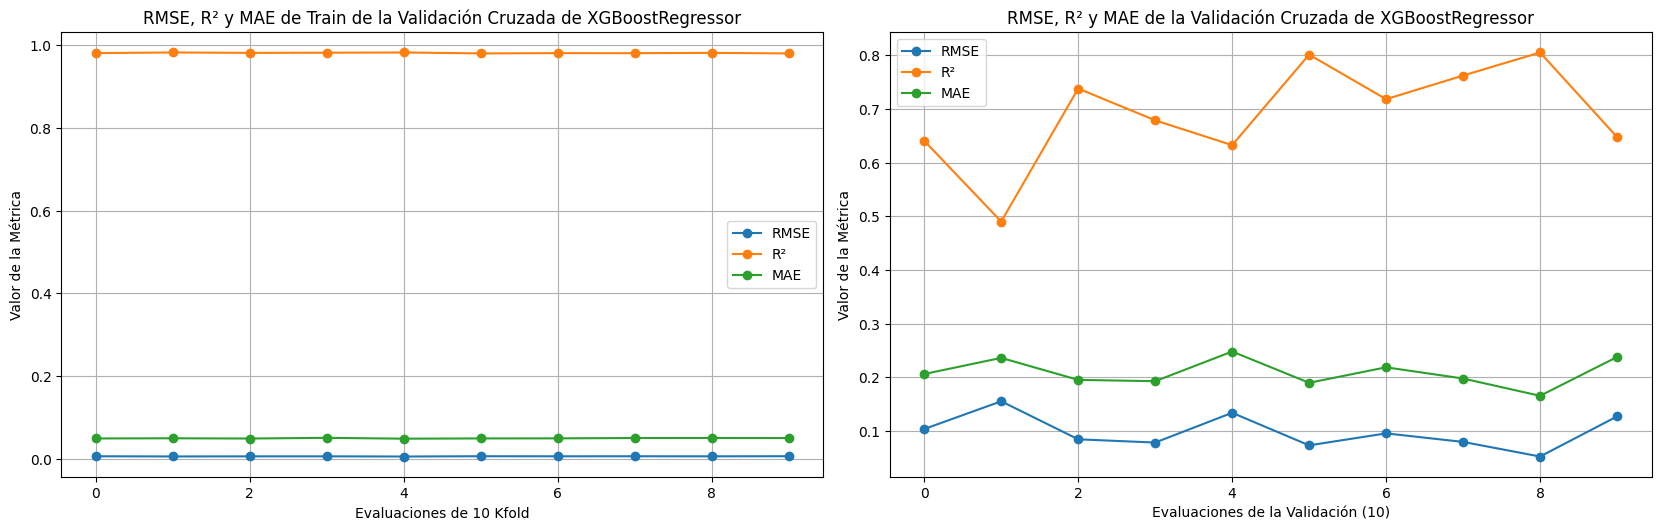

In [112]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(xgb_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(xgb_scores['train_r2'], label='R²', marker='o')
plt.plot(xgb_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de XGBoostRegressor')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(xgb_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(xgb_scores['test_r2'], label='R²', marker='o')
plt.plot(xgb_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de la Validación Cruzada de XGBoostRegressor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada XGBoostRegressor.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada LGBMRegressor

In [74]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

lgbm_scores = cross_validate(lgbm_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(lgbm_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(lgbm_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(lgbm_scores['test_mae']))

time 20000.622223377228
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.1016560699994921
R² promedio (cross_validate):  0.6820678041418807
MAE promedio (cross_validate):  0.21311729190277298


In [75]:
  # Imprimir los resultados
print("Metrics LGBMRegressor...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {lgbm_scores[train_metric]} with mean:{lgbm_scores[train_metric].mean()} and std: {lgbm_scores[train_metric].std()}')
    print(f'   Test: {lgbm_scores[test_metric]}  with mean:{lgbm_scores[test_metric].mean()} and std: {lgbm_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")

Metrics LGBMRegressor...
rmse:
   Train: [0.00271095 0.00196237 0.0024476  0.00293773 0.00266966 0.00274115
 0.00274359 0.00292199 0.00289524 0.00294846] with mean:0.00269787405817341 and std: 0.00028601522103979045
   Test: [0.09826376 0.1626851  0.08859771 0.08189454 0.14860824 0.07702372
 0.09339583 0.08006975 0.05435867 0.13166337]  with mean:0.1016560699994921 and std: 0.03283295694651988
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.99166941 0.99393556 0.99239305 0.9911017  0.99156994 0.99134148
 0.99140971 0.99087958 0.99115135 0.99071009] with mean:0.9916161870535039 and std: 0.0008916522093622541
   Test: [0.65974069 0.46644133 0.72563419 0.66512113 0.59254283 0.79132194
 0.72481285 0.76124037 0.79839802 0.6354247 ]  with mean:0.6820678041418807 and std: 0.0964019793204064
----------------------------------------------------------------------------------------------------------------
mae:
   Tr

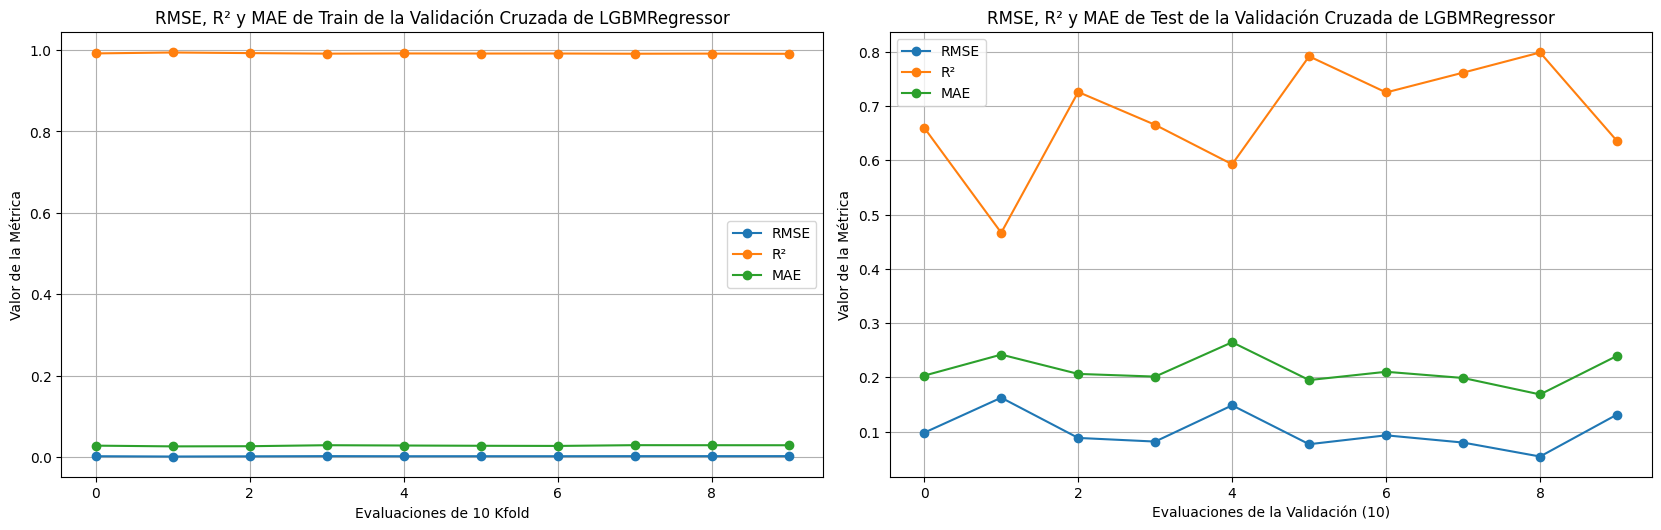

In [76]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(lgbm_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(lgbm_scores['train_r2'], label='R²', marker='o')
plt.plot(lgbm_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de LGBMRegressor')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(lgbm_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(lgbm_scores['test_r2'], label='R²', marker='o')
plt.plot(lgbm_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de LGBMRegressor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada LGBMRegressor.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada GradientBoostingRegressor

In [26]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

gb_scores = cross_validate(gb_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(gb_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(gb_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(gb_scores['test_mae']))

time 333.4053874015808
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.09882981067423416
R² promedio (cross_validate):  0.6916697613806122
MAE promedio (cross_validate):  0.21187863190126474


In [27]:
  # Imprimir los resultados
print("Metrics GradientBoosting...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {gb_scores[train_metric]} with mean:{gb_scores[train_metric].mean()} and std: {gb_scores[train_metric].std()}')
    print(f'   Test: {gb_scores[test_metric]}  with mean:{gb_scores[test_metric].mean()} and std: {gb_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics GradientBoosting...
rmse:
   Train: [0.01028925 0.00939394 0.01010283 0.01035629 0.01049882 0.01096242
 0.0107396  0.01086356 0.01152453 0.01058278] with mean:0.010531401901538893 and std: 0.0005381687708550572
   Test: [0.09913516 0.15678858 0.0731299  0.07599707 0.13563595 0.09067969
 0.09686143 0.07894429 0.05179343 0.12933262]  with mean:0.09882981067423416 and std: 0.03082920710563682
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.96838179 0.97096925 0.96860114 0.96863113 0.9668476  0.96537275
 0.96637393 0.96609151 0.96477786 0.96665614] with mean:0.9672703098039197 and std: 0.0017635875074427873
   Test: [0.65672329 0.48578014 0.77353431 0.68923673 0.62811053 0.75432424
 0.71460162 0.76459637 0.80791184 0.64187854]  with mean:0.6916697613806122 and std: 0.0895100126203111
----------------------------------------------------------------------------------------------------------------
mae:
 

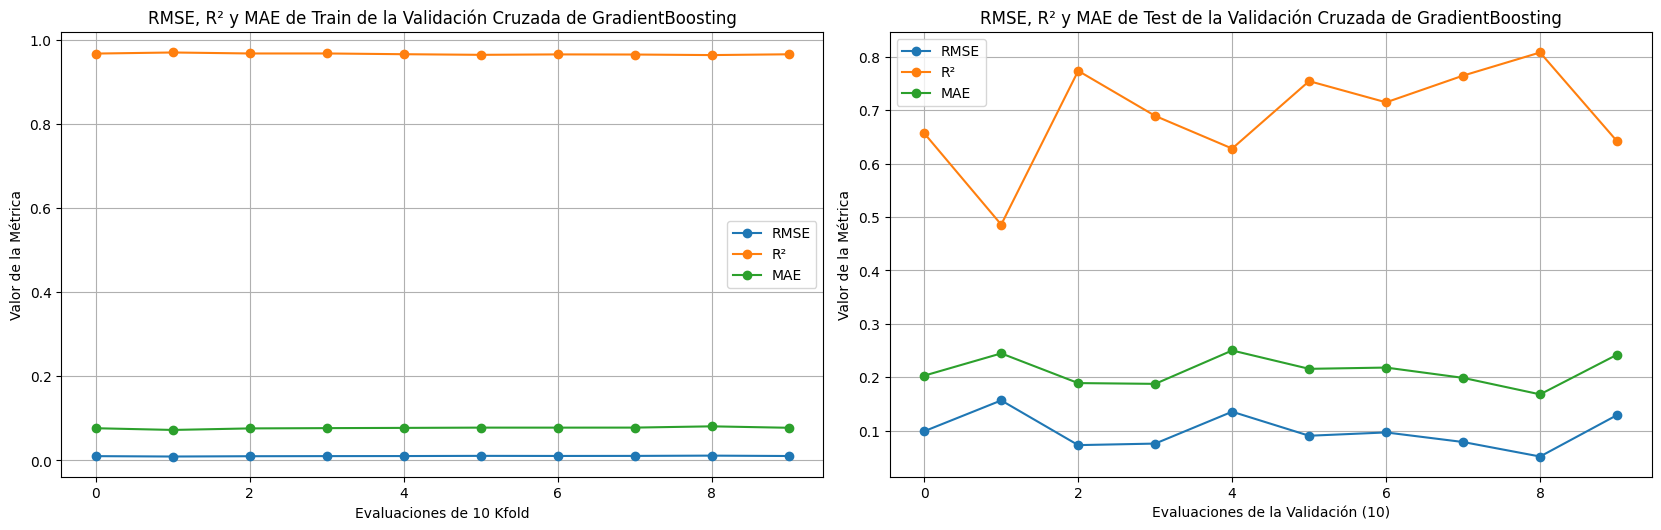

In [28]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(gb_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(gb_scores['train_r2'], label='R²', marker='o')
plt.plot(gb_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de GradientBoosting')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(gb_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(gb_scores['test_r2'], label='R²', marker='o')
plt.plot(gb_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de GradientBoosting')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada GradientBoosting.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada AdaBoostRegressor

In [29]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

ab_scores = cross_validate(ad_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(ab_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(ab_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(ab_scores['test_mae']))

time 243.73351645469666
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.1557264212230215
R² promedio (cross_validate):  0.5147304052577645
MAE promedio (cross_validate):  0.29376280017588924


In [30]:
  # Imprimir los resultados
print("Metrics AdaBoost...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {ab_scores[train_metric]} with mean:{ab_scores[train_metric].mean()} and std: {ab_scores[train_metric].std()}')
    print(f'   Test: {ab_scores[test_metric]}  with mean:{ab_scores[test_metric].mean()} and std: {ab_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics AdaBoost...
rmse:
   Train: [0.12347529 0.12524781 0.1264837  0.12650203 0.12137345 0.12526699
 0.12132414 0.12501188 0.12826612 0.11930007] with mean:0.12422514806415334 and std: 0.0026595417505557344
   Test: [0.15893274 0.18025429 0.12709847 0.10610063 0.19631038 0.15989808
 0.17854071 0.1421044  0.11656961 0.1914549 ]  with mean:0.1557264212230215 and std: 0.03012385492754724
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.6205684  0.61293773 0.60689769 0.61682953 0.61673599 0.60431633
 0.62012979 0.6097996  0.60798339 0.62411344] with mean:0.6140311883552052 and std: 0.006306106392428638
   Test: [0.44966134 0.40881962 0.6064066  0.56613882 0.46175212 0.56679293
 0.47393682 0.57625952 0.56767406 0.46986223]  with mean:0.5147304052577645 and std: 0.06502442971454393
----------------------------------------------------------------------------------------------------------------
mae:
   Train: [

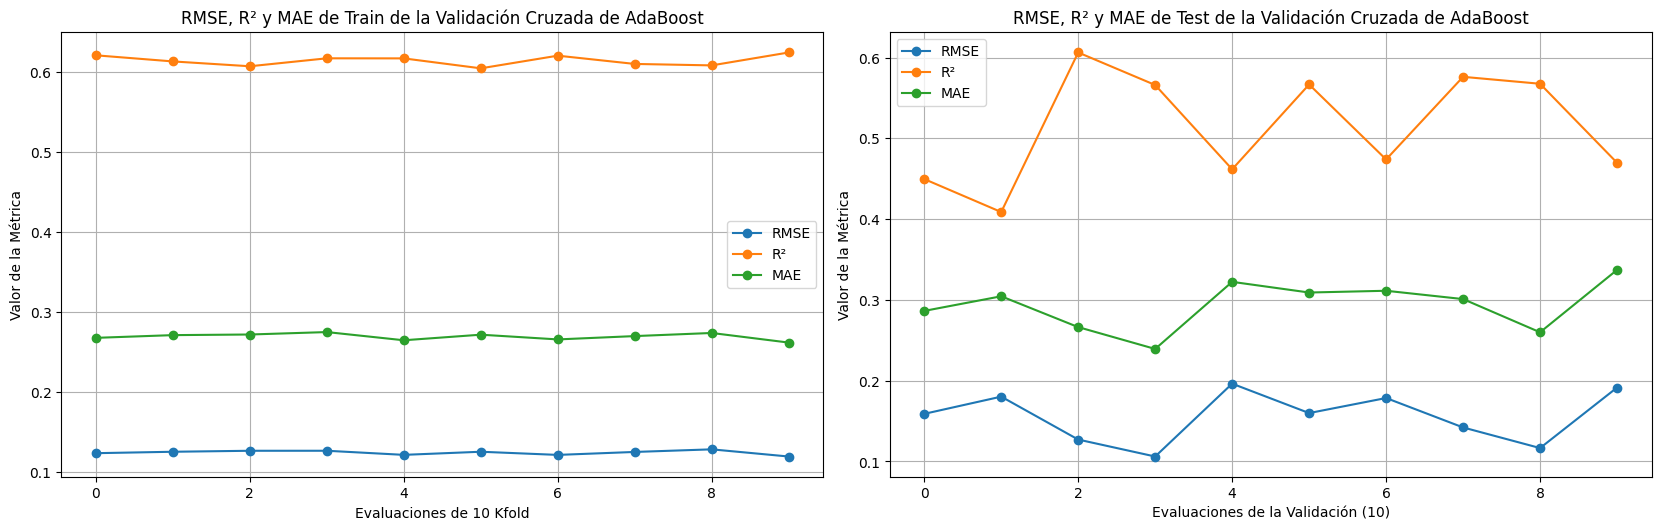

In [31]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(ab_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(ab_scores['train_r2'], label='R²', marker='o')
plt.plot(ab_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de AdaBoost')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(ab_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(ab_scores['test_r2'], label='R²', marker='o')
plt.plot(ab_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de AdaBoost')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada AdaBoost.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada RandomForestRegressor

In [32]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

rf_scores = cross_validate(rf_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(rf_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(rf_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(rf_scores['test_mae']))

time 334.48029804229736
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.11106263218750065
R² promedio (cross_validate):  0.6524223579586611
MAE promedio (cross_validate):  0.22327359959542364


In [33]:
  # Imprimir los resultados
print("Metrics Random Forest...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {rf_scores[train_metric]} with mean:{rf_scores[train_metric].mean()} and std: {rf_scores[train_metric].std()}')
    print(f'   Test: {rf_scores[test_metric]}  with mean:{rf_scores[test_metric].mean()} and std: {rf_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics Random Forest...
rmse:
   Train: [0.02074231 0.0193601  0.02109954 0.02147503 0.01959893 0.02107773
 0.02090176 0.02079269 0.02174973 0.02022702] with mean:0.020702483682814098 and std: 0.0007271397679351968
   Test: [0.11984537 0.16752613 0.08337392 0.08809365 0.15472888 0.08608734
 0.12322453 0.08798815 0.06053052 0.13922784]  with mean:0.11106263218750065 and std: 0.033342352742769796
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.93626023 0.9401701  0.93442414 0.93495284 0.93811195 0.93342131
 0.93455584 0.93509963 0.93352684 0.9362694 ] with mean:0.9356792283675983 and std: 0.0020050855943163338
   Test: [0.58500975 0.45056419 0.74181102 0.63977203 0.57576113 0.76676616
 0.63692376 0.73762852 0.77550828 0.61447874]  with mean:0.6524223579586611 and std: 0.09822583539308972
----------------------------------------------------------------------------------------------------------------
mae:
  

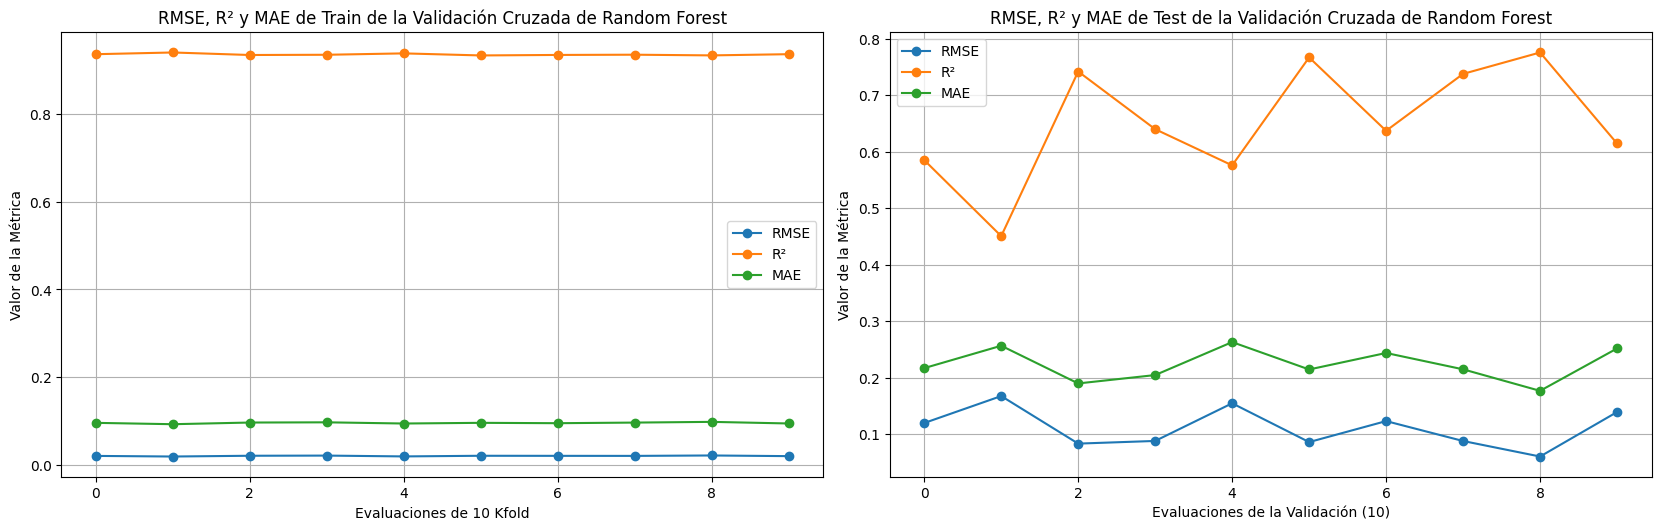

In [34]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(rf_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(rf_scores['train_r2'], label='R²', marker='o')
plt.plot(rf_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de Random Forest')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(rf_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(rf_scores['test_r2'], label='R²', marker='o')
plt.plot(rf_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de Random Forest')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada Random Forest.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada SVR

In [35]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

svr_scores = cross_validate(svr_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(svr_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(svr_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(svr_scores['test_mae']))

time 33.001097679138184
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.14752771023945904
R² promedio (cross_validate):  0.5317146982007693
MAE promedio (cross_validate):  0.26214707225392186


In [36]:
  # Imprimir los resultados
print("Metrics SVRs...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {svr_scores[train_metric]} with mean:{svr_scores[train_metric].mean()} and std: {svr_scores[train_metric].std()}')
    print(f'   Test: {svr_scores[test_metric]}  with mean:{svr_scores[test_metric].mean()} and std: {svr_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics SVRs...
rmse:
   Train: [0.00118464 0.0015826  0.00118936 0.00150372 0.00140117 0.0013992
 0.00148969 0.00170768 0.00159913 0.00161149] with mean:0.0014668683910628684 and std: 0.0001665016165378431
   Test: [0.14467407 0.22053445 0.10257134 0.1063447  0.1698924  0.10910538
 0.10906151 0.12769318 0.18665578 0.1987443 ]  with mean:0.14752771023945904 and std: 0.04130242088852483
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.99635967 0.99510917 0.99630355 0.99544529 0.99557549 0.99558031
 0.99533573 0.99466982 0.99511262 0.99492257] with mean:0.9954414209846121 and std: 0.0005213431561493173
   Test: [0.49903506 0.27671269 0.68236125 0.56514077 0.53418548 0.70440407
 0.67865455 0.61923229 0.30774292 0.44967792]  with mean:0.5317146982007693 and std: 0.14348429607845134
----------------------------------------------------------------------------------------------------------------
mae:
   Train: [0

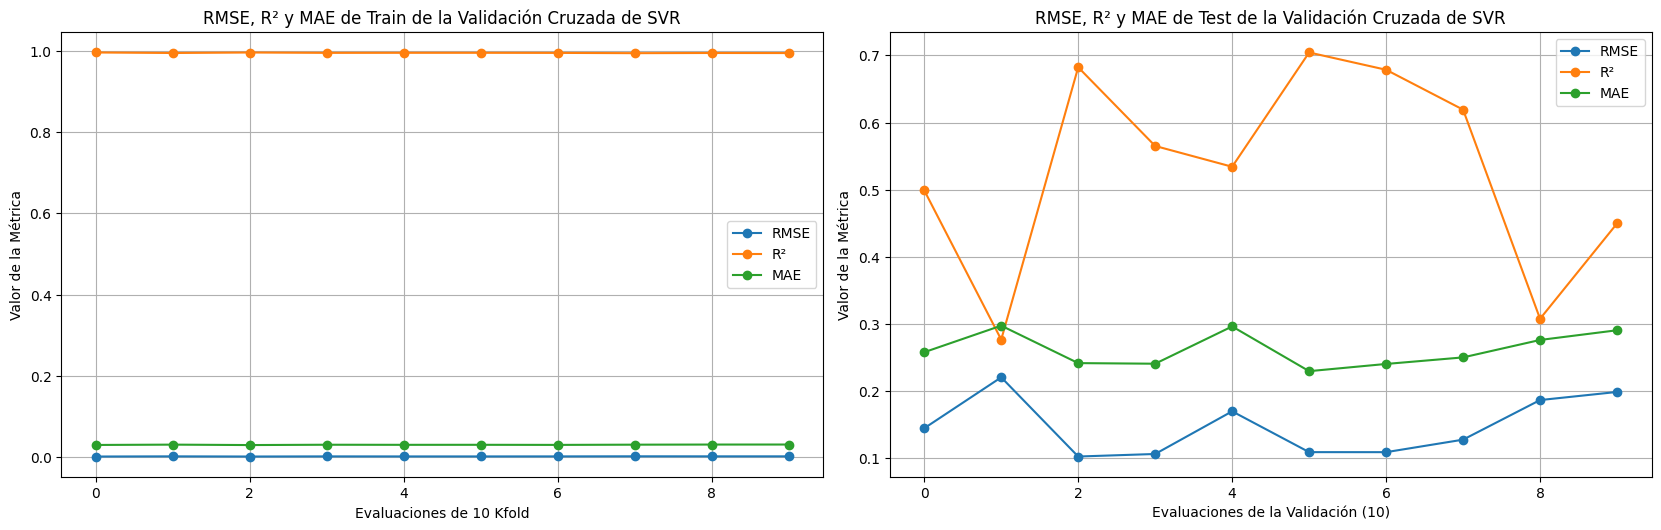

In [37]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(svr_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(svr_scores['train_r2'], label='R²', marker='o')
plt.plot(svr_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de SVR')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(svr_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(svr_scores['test_r2'], label='R²', marker='o')
plt.plot(svr_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de SVR')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada SVR.jpg", bbox_inches='tight')

plt.show()

## Comparación de validación Cruzada de los 6 modelos

In [ ]:
cv_models = [{'model': 'XGBRegressor', 'RMSE': np.mean(xgb_scores['test_rmse']), 'R²': np.mean(xgb_scores['test_r2']), 'MAE': np.mean(xgb_scores['test_mae'])},
                {'model': 'LightGBM', 'RMSE': np.mean(lgbm_scores['test_rmse']), 'R²': np.mean(lgbm_scores['test_r2']), 'MAE': np.mean(lgbm_scores['test_mae'])},
                {'model': 'Gradient Boosting', 'RMSE': np.mean(gb_scores['test_rmse']), 'R²': np.mean(gb_scores['test_r2']), 'MAE': np.mean(gb_scores['test_mae'])},
                {'model': 'AdaBoost Regressor', 'RMSE': np.mean(ab_scores['test_rmse']), 'R²': np.mean(ab_scores['test_r2']), 'MAE': np.mean(ab_scores['test_mae'])},
                {'model': 'Random Forest', 'RMSE': np.mean(rf_scores['test_rmse']), 'R²': np.mean(rf_scores['test_r2']), 'MAE': np.mean(rf_scores['test_mae'])},
                {'model': 'Support Vector Regressor', 'RMSE': np.mean(svr_scores['test_rmse']), 'R²': np.mean(svr_scores['test_r2']), 'MAE': np.mean(svr_scores['test_mae'])}]
cv_models_df = pd.DataFrame(cv_models)

In [114]:
cv_models_df

,model,RMSE,R²,MAE
0,XGBRegressor,0.098449,0.691599,0.208870
1,LightGBM,0.101656,0.682068,0.213117
2,Gradient Boosting,0.098830,0.691670,0.211879
3,AdaBoost Regressor,0.155726,0.514730,0.293763
4,Random Forest,0.111063,0.652422,0.223274
5,Support Vector Regressor,0.147528,0.531715,0.262147


### Barras de comparación de los resultados de Validación Cruzada

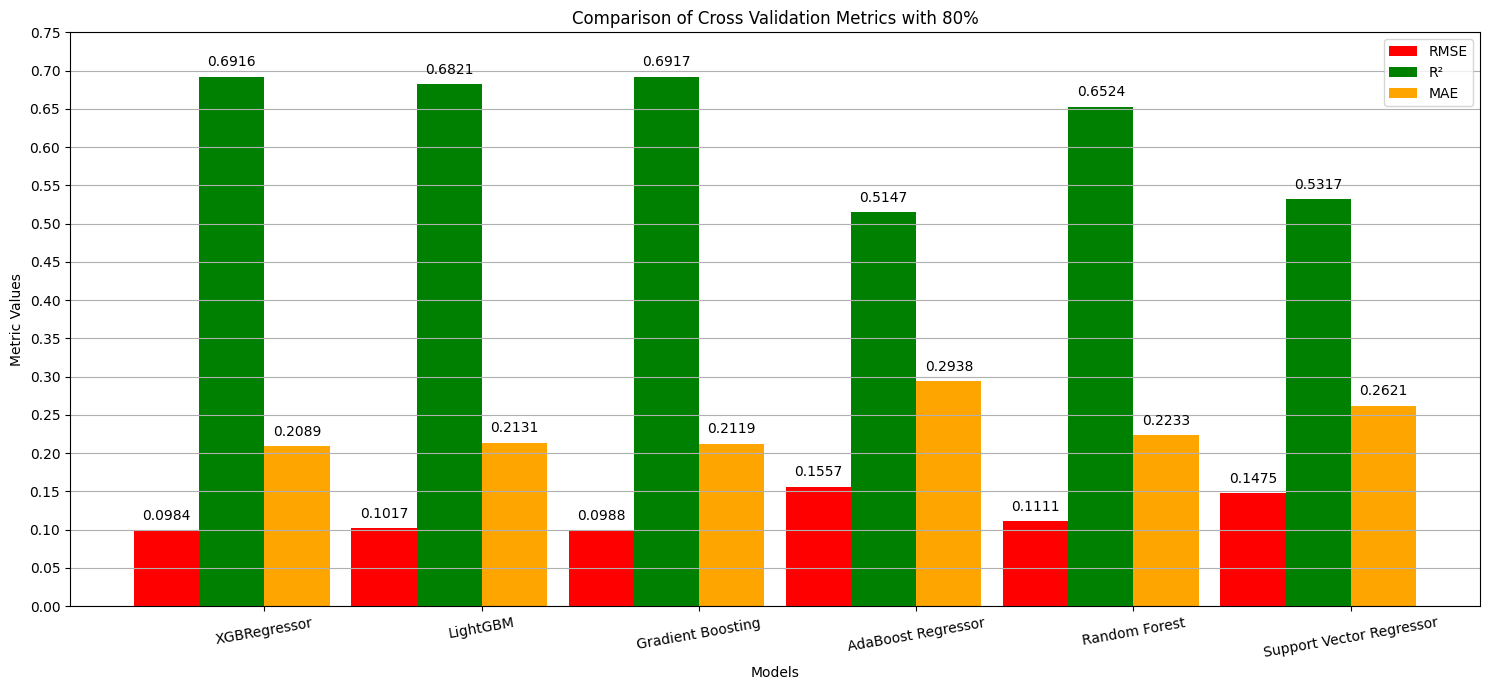

In [126]:
# Ancho de las barras
bar_width = 0.3
models = ['XGBRegressor', 'LightGBM', 'Gradient Boosting', 'AdaBoost Regressor', 'Random Forest', 'Support Vector Regressor']


index = np.arange(len(models))

# Crear la figura y los ejes
plt.figure(figsize=(15, 7))

# Colores de los modelos
colors = {'XGBRegressor': '#7CFC00',
            'Gradient Boosting': '#00FFFF',
            'LightGBM': 'g',
            'AdaBoost Regressor': '#8A2BE2',
            'Random Forest': '#FF8C00',
            'Support Vector Regressor': 'purple'}


# Gráficos de barras con anotaciones
plt.bar(index - bar_width*1.5, cv_models_df['RMSE'], bar_width, label='RMSE', color='red')
for i, valor in enumerate(cv_models_df['RMSE']):
    plt.text(i - bar_width*1.5, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

plt.bar(index - bar_width/2, cv_models_df['R²'], bar_width, label='R²', color='green')
for i, valor in enumerate(cv_models_df['R²']):
    plt.text(i - bar_width/2, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

plt.bar(index + bar_width/2, cv_models_df['MAE'], bar_width, label='MAE', color='orange')
for i, valor in enumerate(cv_models_df['MAE']):
    plt.text(i + bar_width/2, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

# Etiquetas y títulos
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Comparison of Cross Validation Metrics with 80%')
plt.xticks(index, models, rotation=10)
plt.yticks(np.arange(0, cv_models_df['R²'].max() + 0.1, 0.05))
plt.ylim(0, 0.75)
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.grid(axis='y')

plt.savefig("Plots figures/Metricas de Validacion cruzada con barras.jpg", bbox_inches='tight')

# Mostrar el gráfico
plt.show()

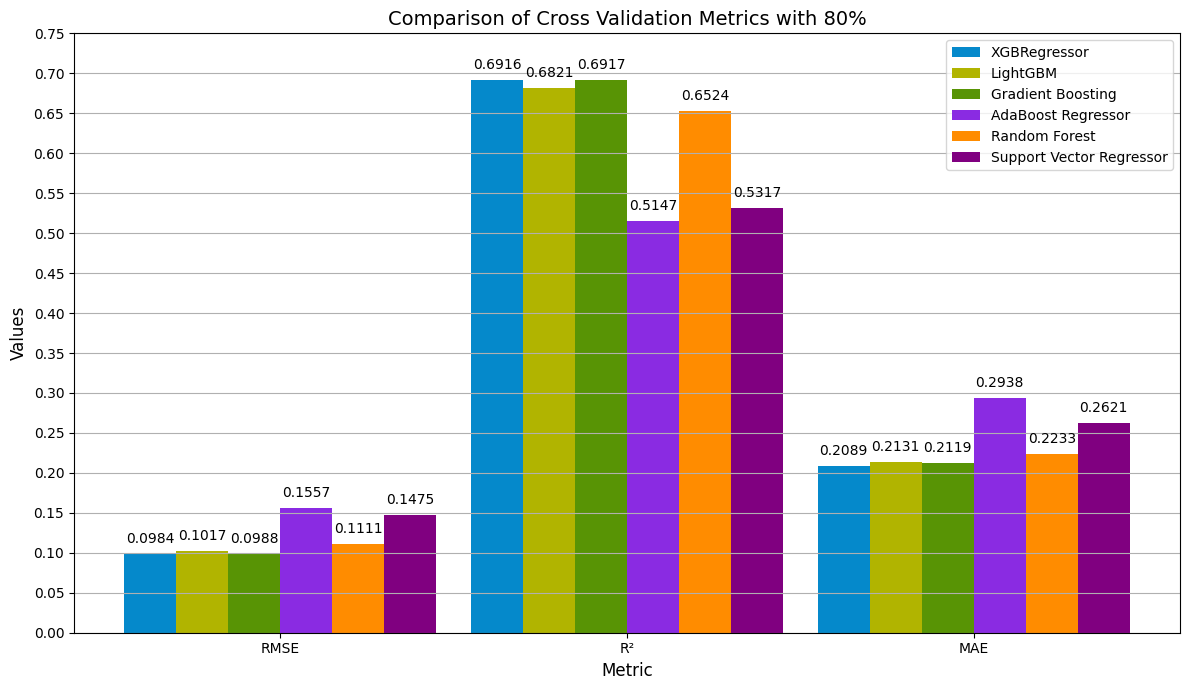

In [116]:
colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

#models_test_df = result_models_test_df.iloc[:,:-3]
#models_test_df = result_models_test_df[['model', 'RMSE', 'R²',	'MAE']]

models = cv_models_df['model']
metrics = cv_models_df.columns[1:]
values = cv_models_df.iloc[:, 1:].values

errors = np.random.uniform(0.001, 0.01, values.shape)  # Simular errores para las barras


# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
x = np.arange(len(metrics))

# Graficar barras para cada modelo
for i, model in enumerate(models):
    #bars = ax.bar(x + i * bar_width, values[i], bar_width, yerr=errors[i], capsize=3,  color=colors[i], label=model)
    bars = ax.bar(x + i * bar_width, values[i], bar_width, color=colors[i], label=model)
    
    # Añadir valores encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Configurar etiquetas y título
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Comparison of Cross Validation Metrics with 80%', fontsize=14)
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(metrics, fontsize=10)
ax.set_yticks(np.arange(0, cv_models_df['R²'].max() + 0.1, 0.05))
ax.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada con barras 2.jpg", bbox_inches='tight')

plt.show()

### Comparacion de los kFold de CV

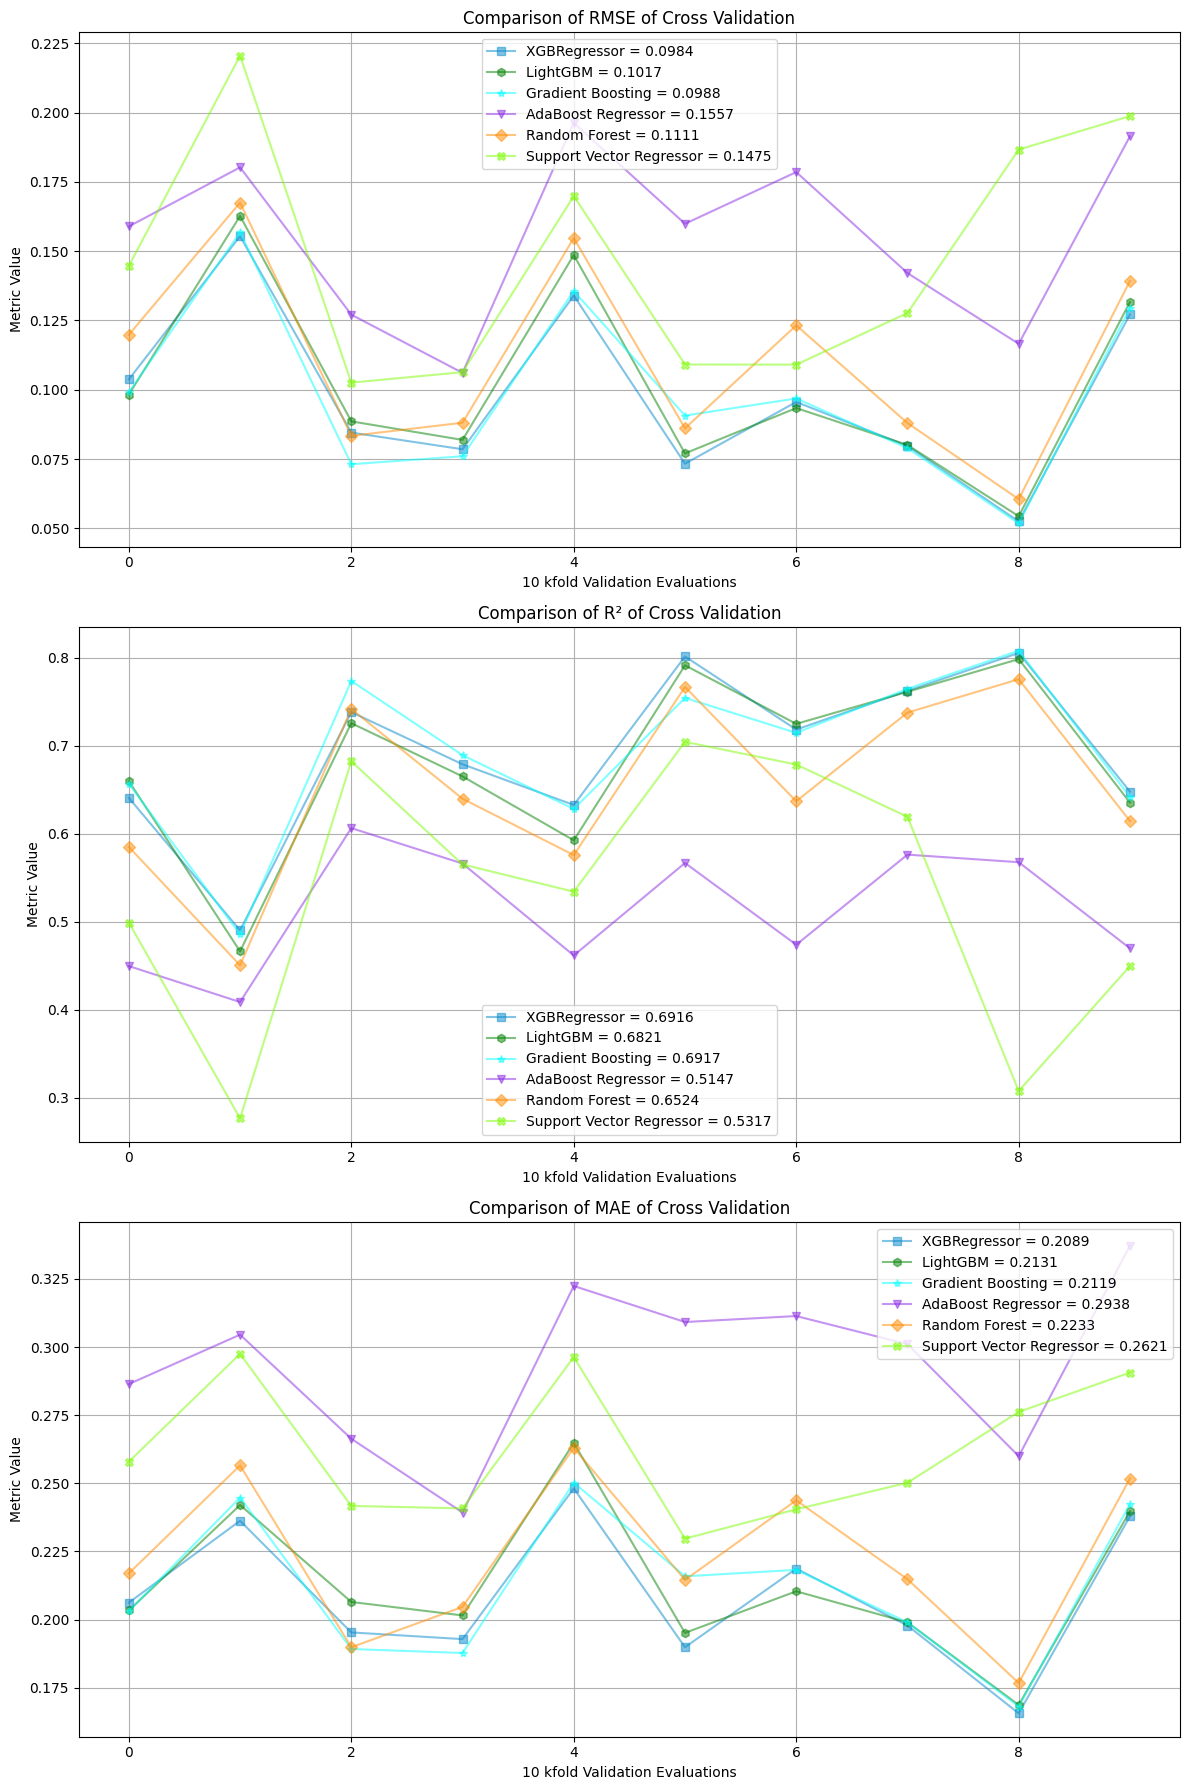

In [117]:
# Graficar los resultados

plt.figure(figsize=(12, 18))  #{row["R²"]:.4f}

plt.subplot(3, 1, 1)
plt.plot(xgb_scores['test_rmse'], label=f'XGBRegressor = {np.mean(xgb_scores["test_rmse"]):.4f}', color='#0589CB', alpha=0.5,  marker="s")
plt.plot(lgbm_scores['test_rmse'], label=f'LightGBM = {np.mean(lgbm_scores["test_rmse"]):.4f}',  color='g', alpha=0.5, marker="h")
plt.plot(gb_scores['test_rmse'], label=f'Gradient Boosting = {np.mean(gb_scores["test_rmse"]):.4f}',  color='#00FFFF', alpha=0.5, marker="*")
plt.plot(ab_scores['test_rmse'], label=f'AdaBoost Regressor = {np.mean(ab_scores["test_rmse"]):.4f}', color='#8A2BE2', alpha=0.5,  marker="v")
plt.plot(rf_scores['test_rmse'], label=f'Random Forest = {np.mean(rf_scores["test_rmse"]):.4f}',  color='#FF8C00', alpha=0.5, marker="D")
plt.plot(svr_scores['test_rmse'], label=f'Support Vector Regressor = {np.mean(svr_scores["test_rmse"]):.4f}', color='#7CFC00', alpha=0.5, marker="X")
plt.xlabel('10 kfold Validation Evaluations')
plt.ylabel('Metric Value')
plt.title('Comparison of RMSE of Cross Validation')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(xgb_scores['test_r2'], label=f'XGBRegressor = {np.mean(xgb_scores["test_r2"]):.4f}',  color='#0589cb', alpha=0.5, marker="s")
plt.plot(lgbm_scores['test_r2'], label=f'LightGBM = {np.mean(lgbm_scores["test_r2"]):.4f}', color='g', alpha=0.5, marker="h")
plt.plot(gb_scores['test_r2'], label=f'Gradient Boosting = {np.mean(gb_scores["test_r2"]):.4f}', color='#00FFFF', alpha=0.5,  marker="*")
plt.plot(ab_scores['test_r2'], label=f'AdaBoost Regressor = {np.mean(ab_scores["test_r2"]):.4f}',  color='#8A2BE2', alpha=0.5,  marker="v")
plt.plot(rf_scores['test_r2'], label=f'Random Forest = {np.mean(rf_scores["test_r2"]):.4f}', color='#FF8C00', alpha=0.5,  marker="D")
plt.plot(svr_scores['test_r2'], label=f'Support Vector Regressor = {np.mean(svr_scores["test_r2"]):.4f}',  color='#7CFC00', alpha=0.5, marker="X")
plt.xlabel('10 kfold Validation Evaluations')
plt.ylabel('Metric Value')
plt.title('Comparison of R² of Cross Validation')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(xgb_scores['test_mae'], label=f'XGBRegressor = {np.mean(xgb_scores["test_mae"]):.4f}',  color='#0589cb', alpha=0.5, marker="s")
plt.plot(lgbm_scores['test_mae'], label=f'LightGBM = {np.mean(lgbm_scores["test_mae"]):.4f}',  color='g', alpha=0.5, marker="h") 
plt.plot(gb_scores['test_mae'], label=f'Gradient Boosting = {np.mean(gb_scores["test_mae"]):.4f}',  color='#00FFFF', alpha=0.5,  marker="*")
plt.plot(ab_scores['test_mae'], label=f'AdaBoost Regressor = {np.mean(ab_scores["test_mae"]):.4f}',  color='#8A2BE2', alpha=0.5, marker="v")
plt.plot(rf_scores['test_mae'], label=f'Random Forest = {np.mean(rf_scores["test_mae"]):.4f}', color='#FF8C00', alpha=0.5, marker="D")
plt.plot(svr_scores['test_mae'], label=f'Support Vector Regressor = {np.mean(svr_scores["test_mae"]):.4f}', color='#7CFC00', alpha=0.5, marker="X")
plt.xlabel('10 kfold Validation Evaluations')
plt.ylabel('Metric Value')
plt.title('Comparison of MAE of Cross Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de kfold de Validacion cruzada.jpg", bbox_inches='tight')

plt.show()